<a href="https://colab.research.google.com/github/Aman8T/Assignments/blob/main/Movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving indian movie data.csv to indian movie data.csv


## IMPORTS


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV

# Data Visualization


In [3]:
df=pd.read_csv('indian movie data.csv',encoding='latin-1',thousands=',')
df.shape

(15509, 10)

In [4]:
df.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [7]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [8]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Converting votes and Duration to float

Votes column


In [9]:
df['Votes']=df['Votes'].astype(str)

In [10]:
#Deleting undefined value causing errors
df=df[df['Votes']!= '$5.16M']

In [11]:
x=[]
for i in df['Votes']:
  x.append(float(i.replace(',','')))

In [12]:
df['Votes']=pd.DataFrame(x)

Duration Column

In [13]:
df['Duration']=df['Duration'].astype(str)

In [14]:
x=[]
for i in df['Duration']:
  x.append(float(i.replace('min','')))

In [15]:
df['Duration']=pd.DataFrame(x)

In [16]:
df.dtypes

Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Changing Year column wit reference to current year

In [17]:
#getting Todays date and year
from datetime import date
todays_date=date.today()
current_year=todays_date.year
current_year

2023

In [18]:
#deleting null values as they are very less:
df.dropna(axis=0,subset=['Year'],inplace=True)

In [19]:
df.isnull().sum()

Name           0
Year           0
Duration    7946
Genre       1841
Rating      7061
Votes       7183
Director     497
Actor 1     1488
Actor 2     2197
Actor 3     2907
dtype: int64

In [20]:
df['Year']=df['Year'].astype(str)

In [21]:
x=[]
for i in df['Year']:
  
  x.append(int(i[1:-1]))


In [22]:
df['Year']=pd.DataFrame(x)

In [23]:
df['Year'].unique()

array([2021., 2019., 2010., 1997., 2005., 2008., 2012., 2014., 2004.,
       2016., 1991., 1990., 2018., 1987., 1948., 1958., 2017., 2020.,
       2009., 2002., 1993., 1946., 1994., 2007., 2013., 2003., 1998.,
       1979., 1956., 1974., 2015., 2006., 1981., 1985., 2011., 2001.,
       1967., 1988., 1995., 1959., 1996., 1970., 1976., 2000., 1973.,
       1999., 1968., 1943., 1953., 1986., 1983., 1989., 1982., 1977.,
       1957., 1950., 1992., 1969., 1975., 1947., 1972., 1971., 1935.,
       1978., 1960., 1944., 1963., 1940., 1984., 1934., 1955., 1936.,
       1980., 1966., 1949., 1962., 1964., 1952., 1933., 1942., 1939.,
       1951., 1954., 1945., 1961., 1965., 1938., 1941., 1931., 1937.,
       2022., 1932., 1923., 1915., 1928., 1922., 1917., 1913., 1930.,
       1926., 1914., 1924.,   nan])

In [24]:
df.shape

(14980, 10)

In [25]:
df.isnull().sum()

Name           0
Year         508
Duration    7946
Genre       1841
Rating      7061
Votes       7183
Director     497
Actor 1     1488
Actor 2     2197
Actor 3     2907
dtype: int64

In [26]:
df.dtypes

Name         object
Year        float64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [27]:
#Creating reference with current year
df['Year']=current_year-df['Year']

In [28]:
df["Year"]

1         2.0
2         4.0
3        13.0
4        26.0
5        18.0
         ... 
15504     NaN
15505     NaN
15506     NaN
15507     NaN
15508     NaN
Name: Year, Length: 14980, dtype: float64

In [29]:
mean_year_rating=df.groupby('Year')['Rating'].mean()

In [30]:
sns.set(font_scale=4)
%matplotlib inline
plt.style.use('ggplot') 

Text(0.5, 1.0, 'Average Rating Of Years with reference to current year')

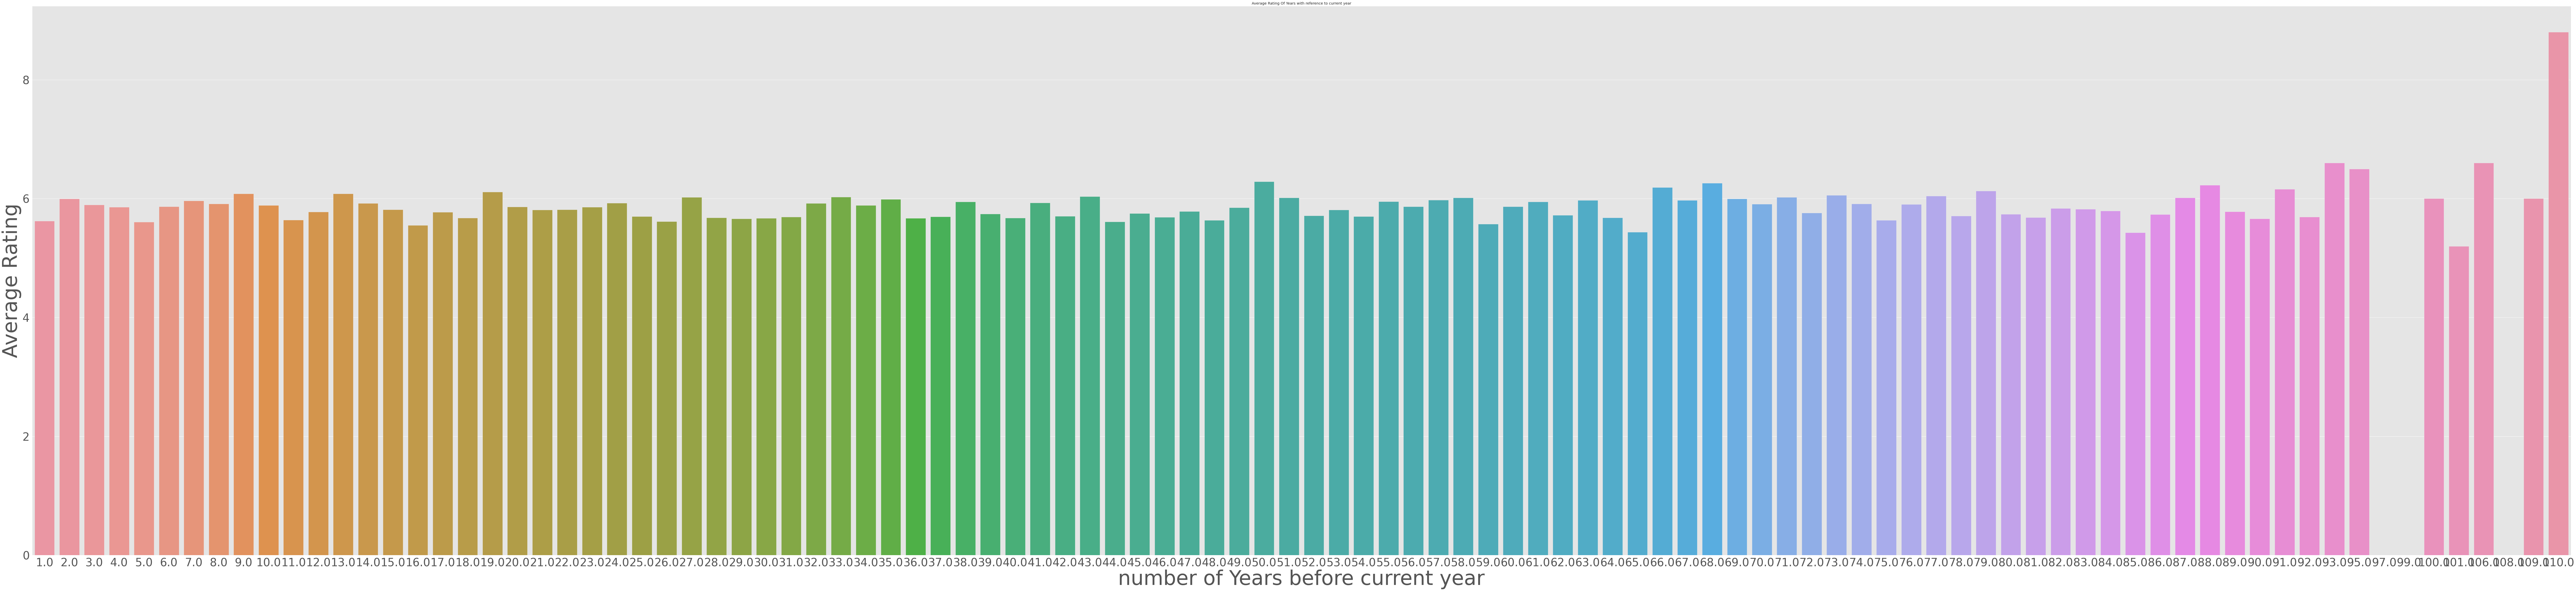

In [31]:
plt.figure(figsize=(180,40))
sns.barplot(x=mean_year_rating.index,y=mean_year_rating)
plt.xlabel('number of Years before current year', fontsize=80)
plt.ylabel('Average Rating', fontsize=80)
plt.title('Average Rating Of Years with reference to current year')

The graph Looks Equally distributed

In [32]:
#plotting Average Ratings of 100 Directors
Mean_director_rating=df.groupby('Director')['Rating'].mean()[:100]

Text(0.5, 1.0, 'Average Rating Of movie By Each director')

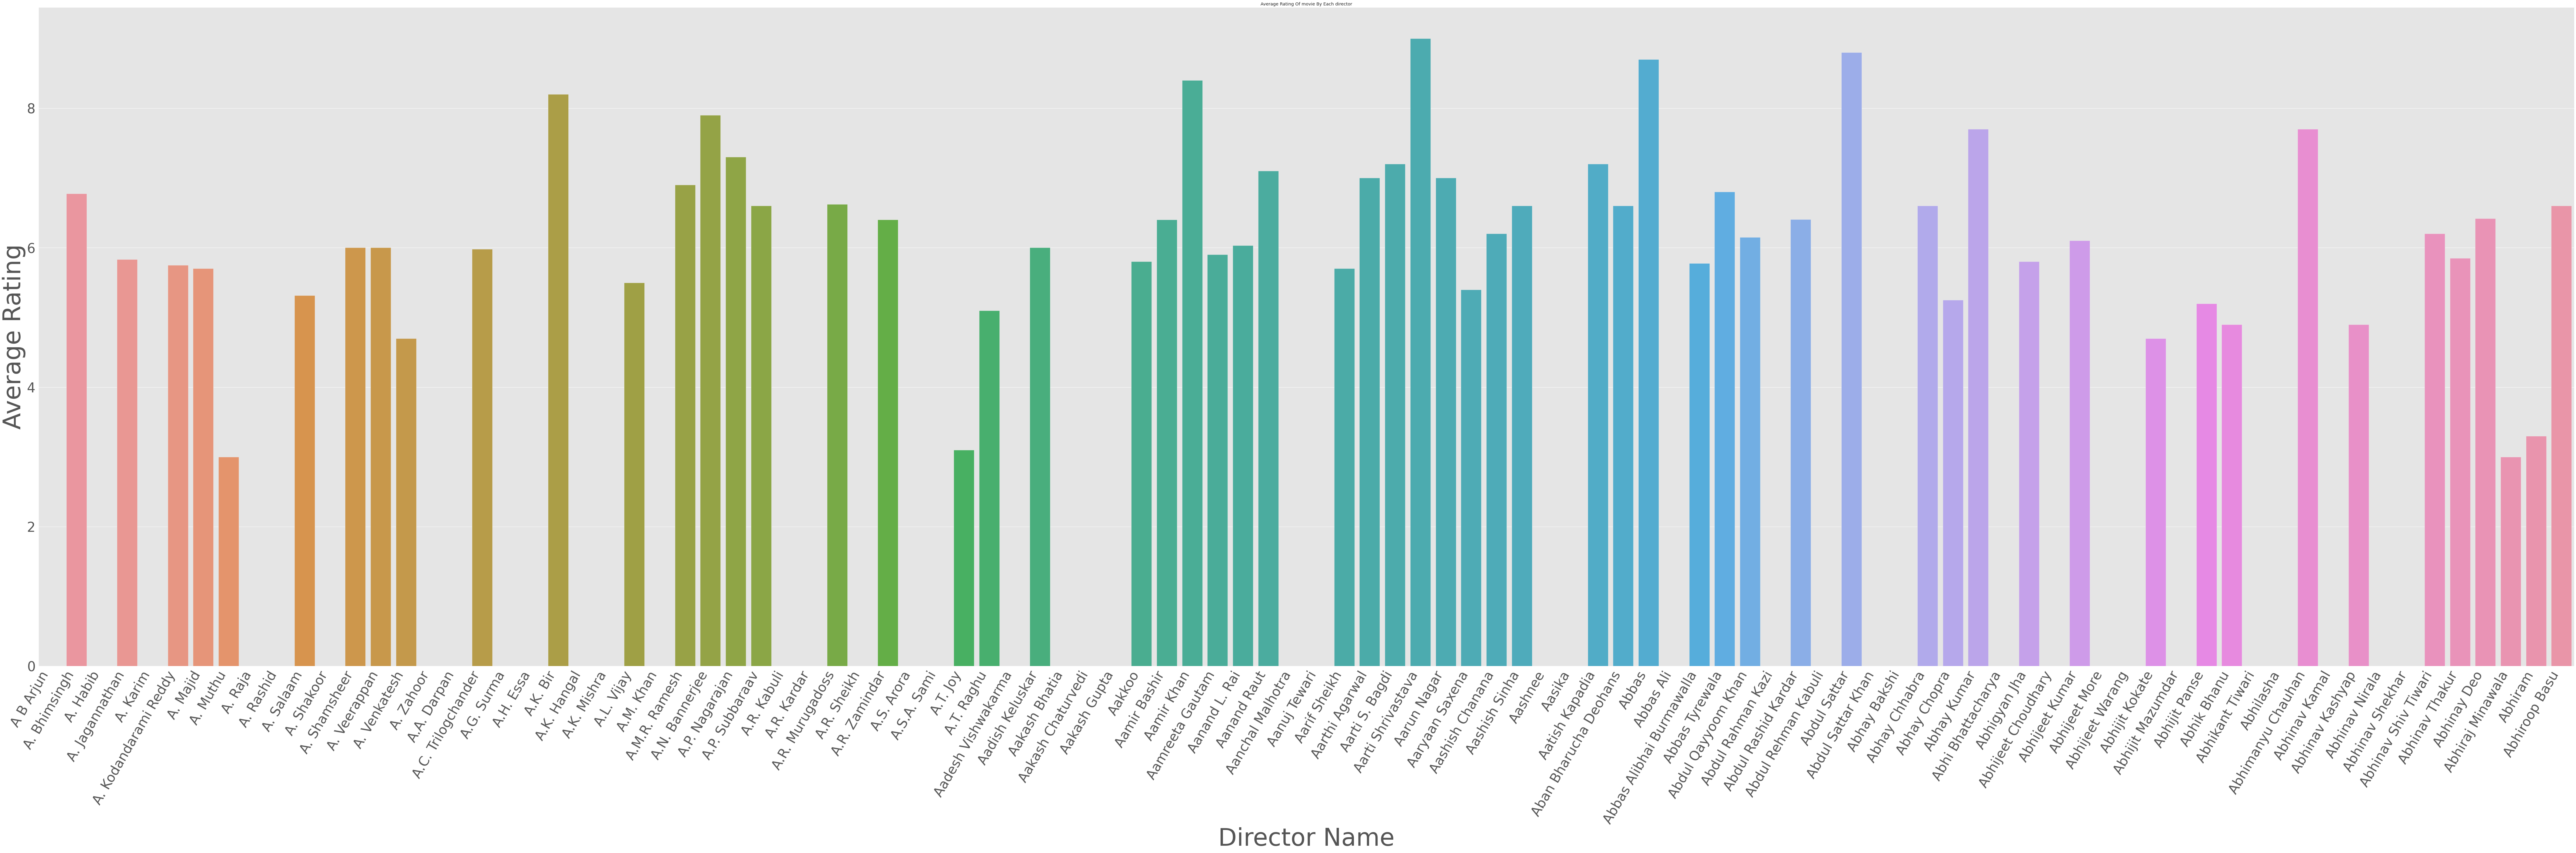

In [33]:
plt.figure(figsize=(150,40))
sns.barplot(x=Mean_director_rating.index,y=Mean_director_rating)
plt.xlabel('Director Name', fontsize=80)
plt.ylabel('Average Rating', fontsize=80)
plt.xticks(rotation = 60, ha = 'right')
plt.title('Average Rating Of movie By Each director')

Graph shows noticable variation, thus director name is an important feature, as expected

In [34]:
#plotting Average Ratings of 100 Actors
Mean_actor_rating=df.groupby('Actor 1')['Rating'].mean()[:100]

Text(0.5, 1.0, 'Average Rating Of movie By Each Actor')

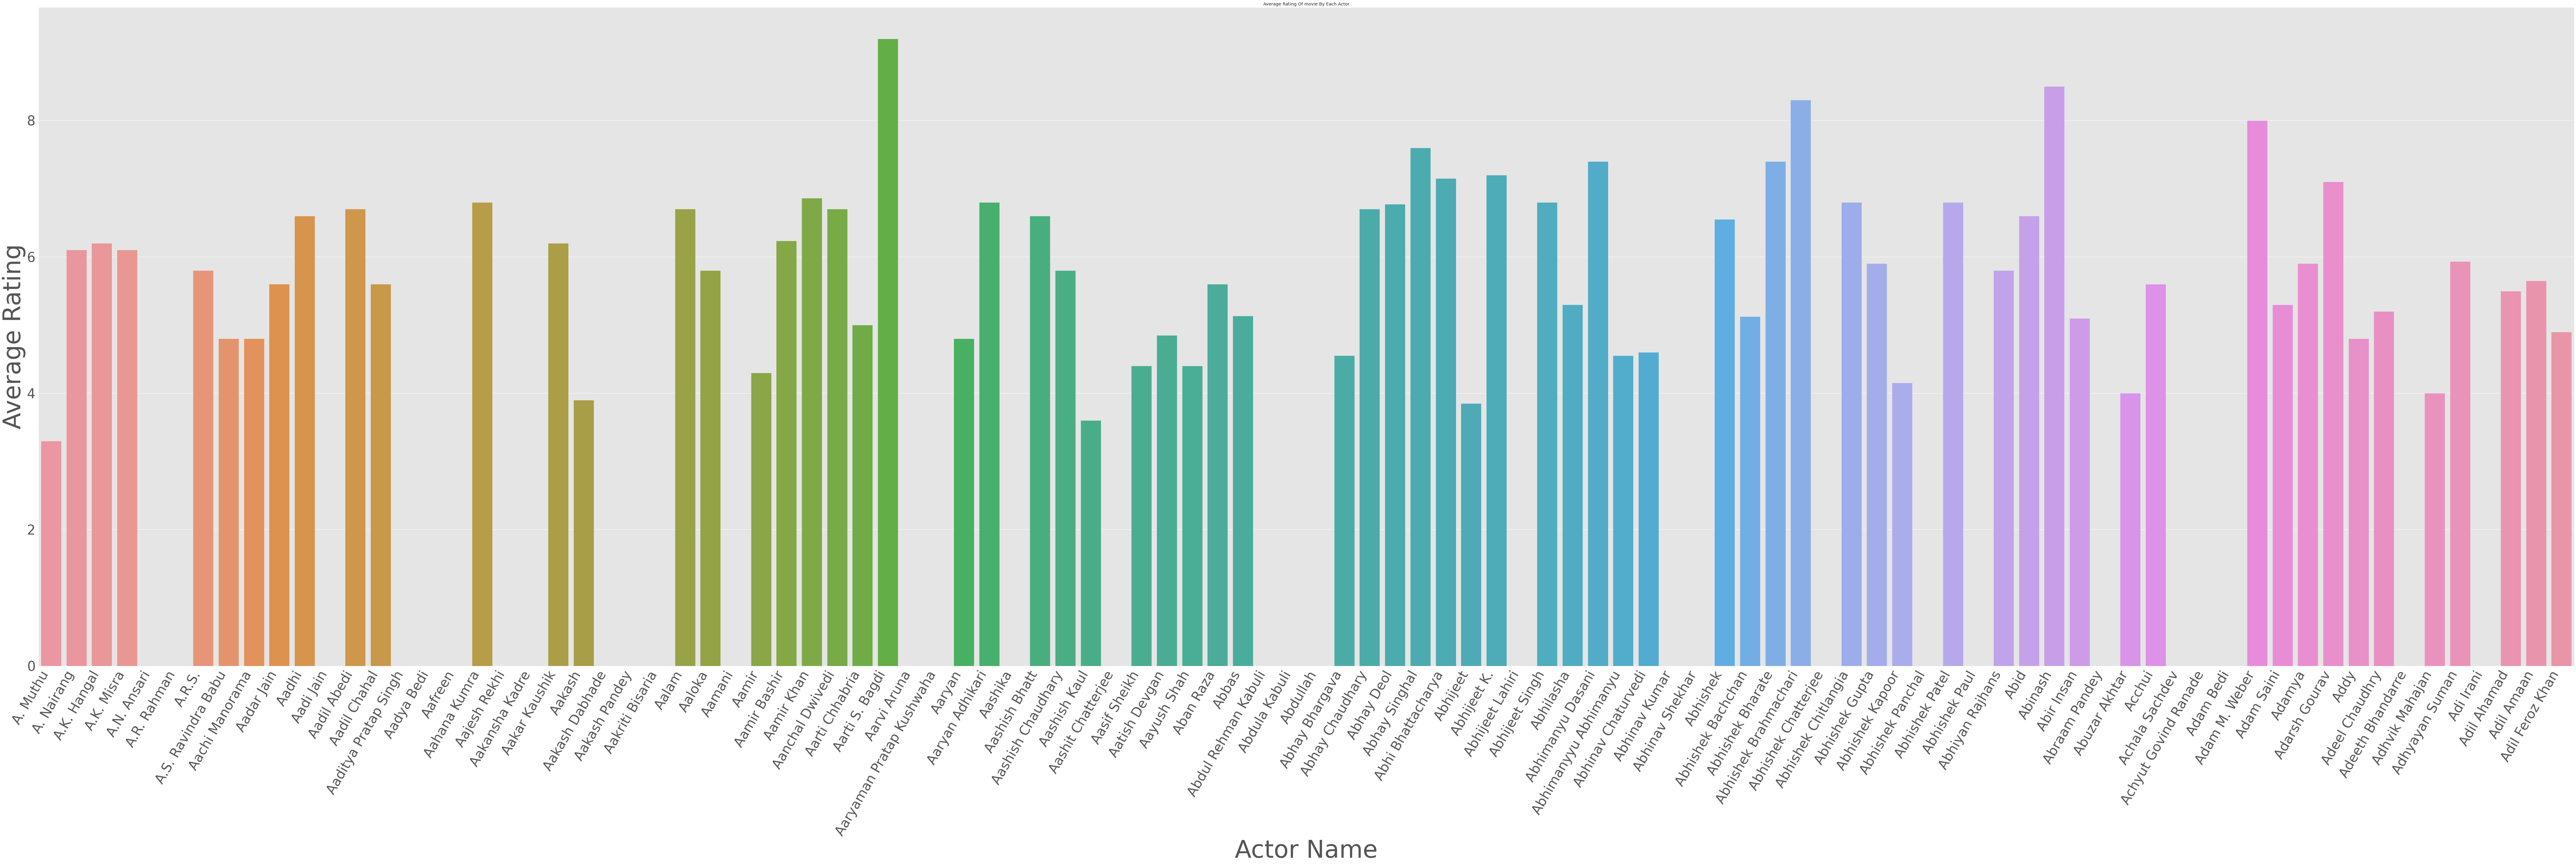

In [35]:
plt.figure(figsize=(150,40))
sns.barplot(x=Mean_actor_rating.index,y=Mean_actor_rating)
plt.xlabel('Actor Name', fontsize=80)
plt.ylabel('Average Rating', fontsize=80)
plt.xticks(rotation = 60, ha = 'right')
plt.title('Average Rating Of movie By Each Actor')

Some actors are famous and thus have higher ratings as compared to others.

In [36]:
mean_genre_rating=df.groupby('Genre')["Rating"].mean()[:150]
mean_genre_rating

Genre
Action                           5.092566
Action, Adventure                5.558333
Action, Adventure, Biography     7.800000
Action, Adventure, Comedy        5.610000
Action, Adventure, Crime         5.556250
                                   ...   
Animation, Adventure, Drama      7.900000
Animation, Adventure, Family     5.300000
Animation, Adventure, Fantasy    5.333333
Animation, Comedy                     NaN
Animation, Comedy, Drama         5.900000
Name: Rating, Length: 150, dtype: float64

Text(0.5, 1.0, 'Average Rating Of movie By Each Genre')

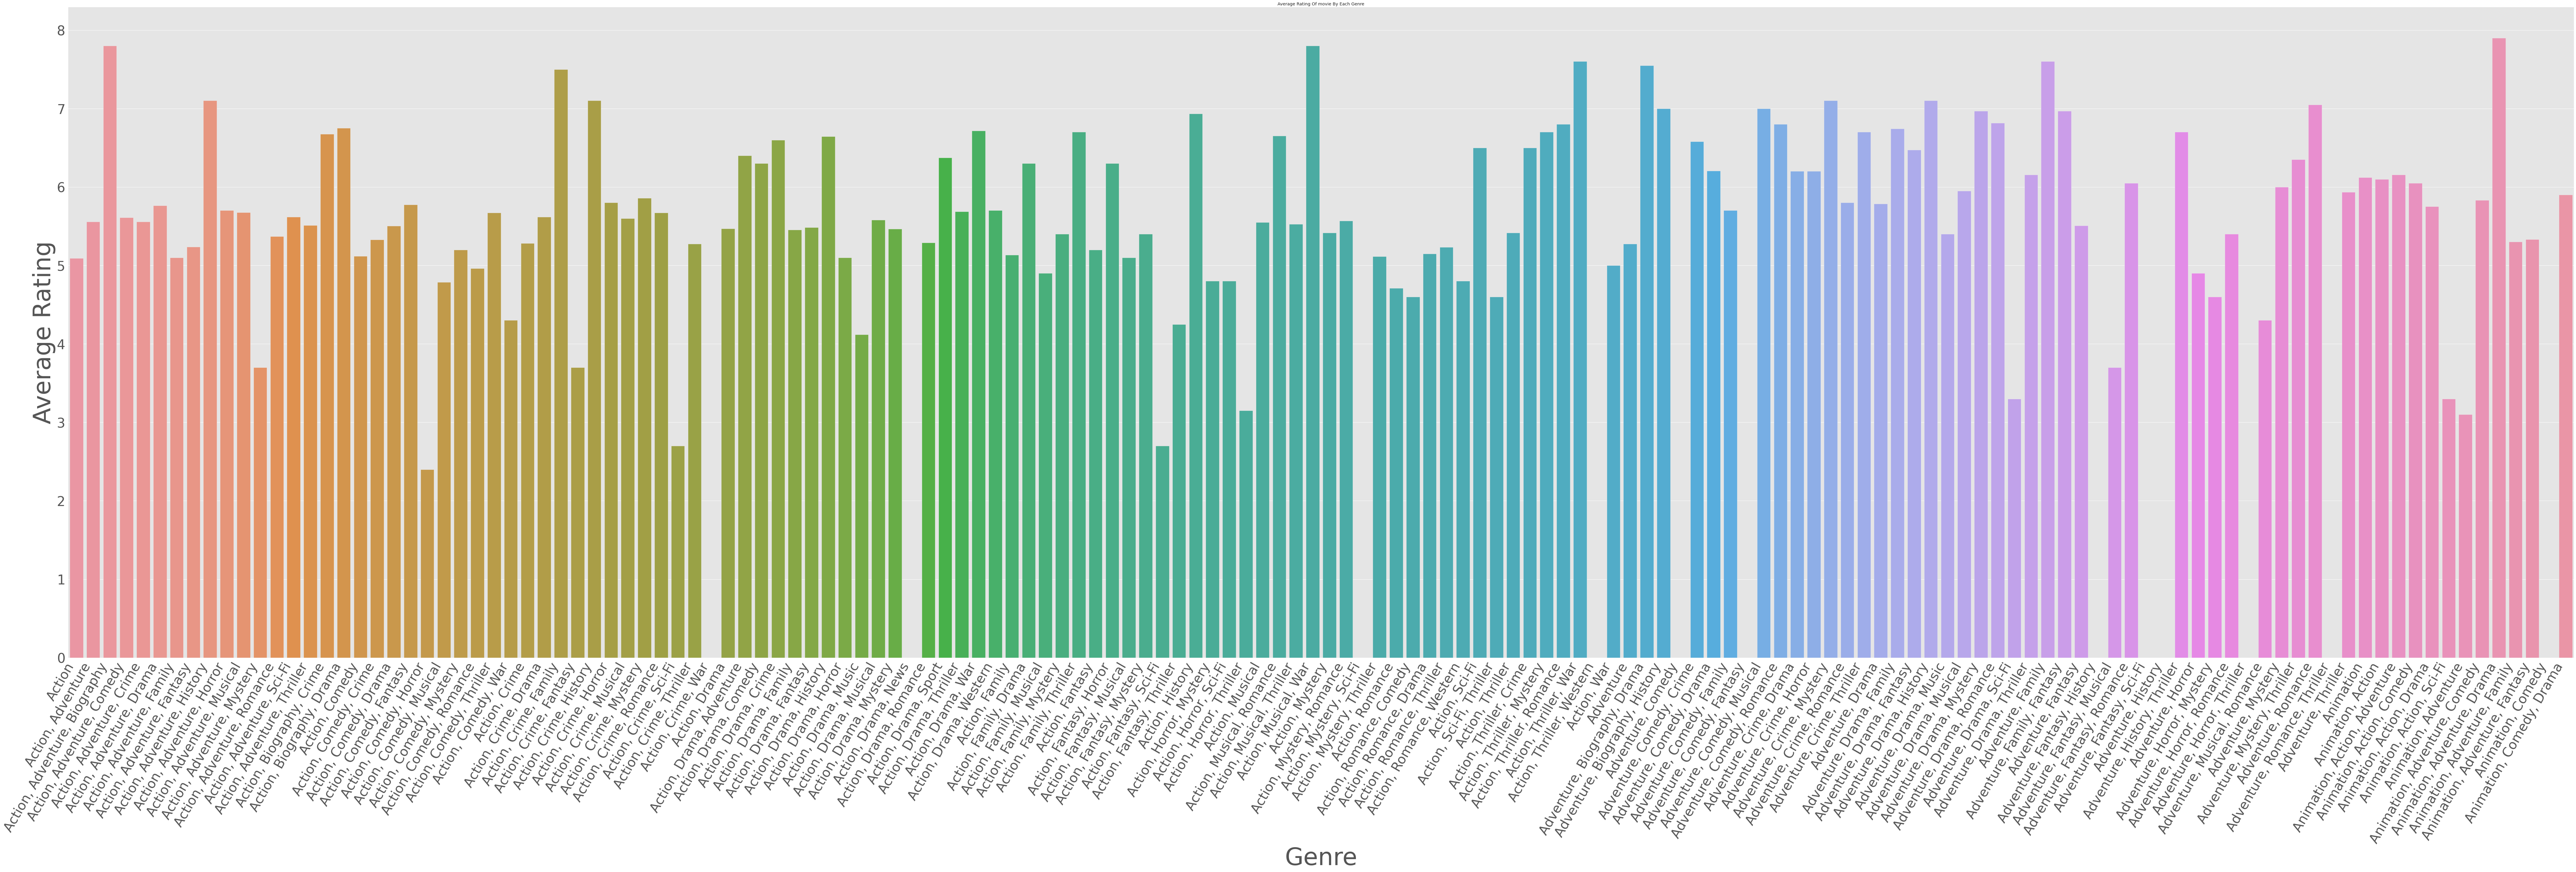

In [37]:
plt.figure(figsize=(150,40))
sns.barplot(x=mean_genre_rating.index,y=mean_genre_rating)
plt.xlabel('Genre', fontsize=80)
plt.ylabel('Average Rating', fontsize=80)
plt.xticks(rotation = 60, ha = 'right')
plt.title('Average Rating Of movie By Each Genre')

In [38]:
sns.set(font_scale=1)

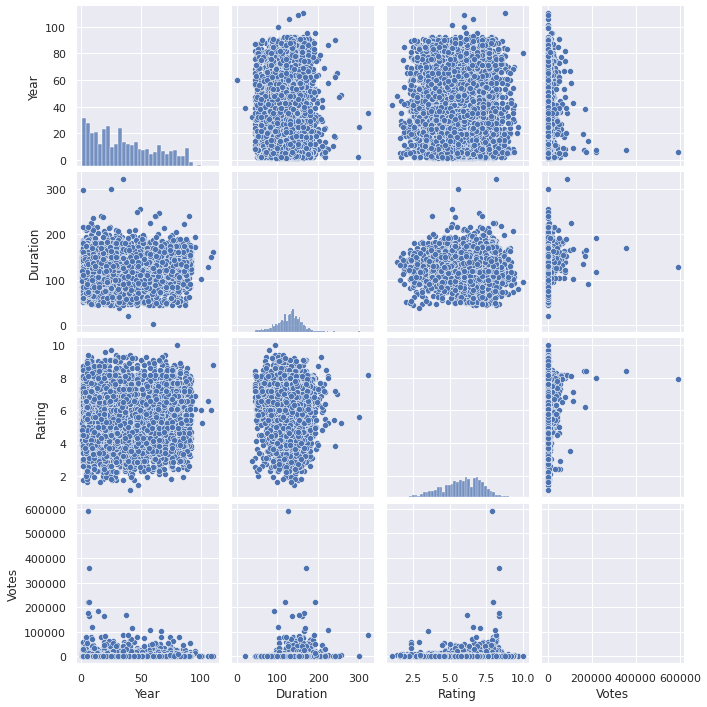

In [39]:
#Creating a Pairplot
sns.pairplot(df)

# Pre-Processing


In [40]:
df.isnull().sum()

Name           0
Year         508
Duration    7946
Genre       1841
Rating      7061
Votes       7183
Director     497
Actor 1     1488
Actor 2     2197
Actor 3     2907
dtype: int64

In [41]:
df.dropna(axis=0,subset=['Year',"Director"],inplace=True)

In [42]:
df.shape

(13999, 10)

Deleting Duration Column as it has more than 50% Missing Values

In [43]:
df.shape

(13999, 10)

In [44]:
df.isnull().sum()

Name           0
Year           0
Duration    7298
Genre       1772
Rating      6377
Votes       6565
Director       0
Actor 1      961
Actor 2     1655
Actor 3     2345
dtype: int64

In [45]:
#Replacing the Votes with the median of the value

df["Votes"].fillna(df["Votes"].median(),inplace=True)

In [46]:
df.isnull().sum()

Name           0
Year           0
Duration    7298
Genre       1772
Rating      6377
Votes          0
Director       0
Actor 1      961
Actor 2     1655
Actor 3     2345
dtype: int64

In [47]:
no_data=df[(df['Actor 1'].isnull()) & (df['Actor 2'].isnull()) & (df['Actor 3'].isnull())].index

In [48]:
no_data.shape

(961,)

deletibg no data values

In [49]:
df.drop(no_data,inplace=True)

In [50]:
df.shape

(13038, 10)

In [51]:
df.isnull().sum()

Name           0
Year           0
Duration    6634
Genre       1421
Rating      5531
Votes          0
Director       0
Actor 1        0
Actor 2      694
Actor 3     1384
dtype: int64

In [52]:
df.drop_duplicates(inplace=True)
df.shape

(13038, 10)

In [53]:
#Replacing the Rating with the median of the value

df["Rating"].fillna(df["Rating"].median(),inplace=True)

In [54]:
#Replacing the Duration with the median of the value

df["Duration"].fillna(df["Duration"].median(),inplace=True)

In [55]:
#Replacing the Genre with the Not Available Values

df["Genre"].fillna("Not Available",inplace=True)

In [56]:
#Replacing the Actor 2 with the Not Available Values

df["Actor 2"].fillna("Not Available",inplace=True)

In [57]:
#Replacing the Actor 3 with the Not Available Values

df["Actor 3"].fillna("Not Available",inplace=True)

In [58]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

Dropping name as it adds nothing to model

# Different Encodings: Try One encoding at a time, as it changes the Original Data.

# Label Encoding

In [ ]:
cat_cols=['Year','Director','Genre','Actor 1','Actor 2','Actor 3']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes
## We have label encoded the categorical columns in the dataset and transformed them to numeric values.

Year          int64
Duration    float64
Genre         int64
Rating      float64
Votes       float64
Director      int64
Actor 1       int64
Actor 2       int64
Actor 3       int64
dtype: object

In [ ]:
df.shape

(13489, 9)

In [ ]:
df

Year  Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  \
1        95     109.0    286     7.0    8.0      1390     3161     4607   
2        97      90.0    337     6.0   54.0      4565     3572     2769   
3        95     110.0    222     4.4   35.0      2976     2816     1447   
4        86     105.0    286     6.0   54.0       347     3000     3341   
5        73     147.0    191     4.7  827.0      3408      872      115   
...     ...       ...    ...     ...    ...       ...      ...      ...   
15503    65     132.0     28     5.8   11.0      3960      963     1536   
15504    64     129.0      0     4.6  655.0      2426     2499     4140   
15505    75     132.0     39     4.5   54.0      2258      217     4360   
15506    81     132.0      0     6.0   54.0      2187     3471     2653   
15508    74     132.0     39     6.2   54.0      1977     1108     1529   

       Actor 3  
1          510  
2         3330  
3         3876  
4          392  
5         3691  
...        ...  
15503     3027  
15504     4109  
15505      503  
15506     2586  
15508      474  

[13489 rows x 9 columns]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X=df.drop(labels=['Rating'],axis=1)
Y=df['Rating']


In [ ]:
stand_df=scaler.fit_transform(X)

In [ ]:
# Train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(stand_df,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(10791, 8) (2698, 8) (10791,) (2698,)


In [ ]:
lm=LinearRegression()   
lm = lm.fit(X_train,Y_train)

#Traindata Predictions
train_pred = lm.predict(X_train)

#testdata predictions
test_pred = lm.predict(X_test)


RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lm.score(X_train, Y_train))
print('RSquared value on test:',lm.score(X_test, Y_test))

RMSE TrainingData =  1.0325145630696972
RMSE TestData =  1.0048972357781965
--------------------------------------------------
RSquared value on train: 0.03881929405441986
RSquared value on test: 0.03897658234501056


In [ ]:
errors = abs(test_pred - Y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.45 %.


In [ ]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,Y_train)

#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.850657765843877
RMSE TestData =  0.9944359830769341
--------------------------------------------------
RSquared value on train: 0.3475872872041028
RSquared value on test: 0.05888146135434913


In [ ]:
errors = abs(test_preds - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.4 %.


In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.3562270514258385
RMSE TestData =  0.9203908752437866
--------------------------------------------------
RSquared value on train: 0.8855893468115649
RSquared value on test: 0.1938139553624224


In [ ]:
errors = abs(test_preds1 - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.07 %.


In [ ]:
xgbr =xgb.XGBRegressor().fit(X_train, Y_train)
#predicting train
train_preds6=xgbr.predict(X_train)
#predicting on test
test_preds6=xgbr.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds6)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds6)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',xgbr.score(X_train, Y_train))
print('RSquared value on test:',xgbr.score(X_test, Y_test))

[18:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE TrainingData =  0.9077540662645356
RMSE TestData =  0.9118924438481678
--------------------------------------------------
RSquared value on train: 0.25706797632393474
RSquared value on test: 0.2086330635276984


In [ ]:
errors = abs(test_preds6 - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.63 %.


# Using Binary Encoder

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.1 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
bin_encoder= ce.BinaryEncoder(cols=['Year','Director','Genre','Actor 1','Actor 2','Actor 3',],return_df=True)

In [ ]:
data_bin_encoded=bin_encoder.fit_transform(df) 
data_bin_encoded

Year_0  Year_1  Year_2  Year_3  Year_4  Year_5  Year_6  Genre_0  \
1           0       0       0       0       0       0       1        0   
2           0       0       0       0       0       1       0        0   
3           0       0       0       0       0       0       1        0   
4           0       0       0       0       0       1       1        0   
5           0       0       0       0       1       0       0        0   
...       ...     ...     ...     ...     ...     ...     ...      ...   
15503       0       1       1       0       0       0       0        0   
15504       0       1       0       0       1       0       1        0   
15505       0       1       0       1       0       1       0        0   
15506       0       0       0       0       1       0       1        0   
15508       0       0       1       1       0       1       1        0   

       Genre_1  Genre_2  ...  Actor 3_3  Actor 3_4  Actor 3_5  Actor 3_6  \
1            0        0  ...          0          0          0          0   
2            0        0  ...          0          0          0          0   
3            0        0  ...          0          0          0          0   
4            0        0  ...          0          0          0          0   
5            0        0  ...          0          0          0          0   
...        ...      ...  ...        ...        ...        ...        ...   
15503        0        0  ...          0          1          0          0   
15504        0        0  ...          1          0          0          0   
15505        0        0  ...          0          1          1          1   
15506        0        0  ...          0          0          0          0   
15508        0        0  ...          1          1          0          1   

       Actor 3_7  Actor 3_8  Actor 3_9  Actor 3_10  Actor 3_11  Actor 3_12  
1              0          0          0           0           0           1  
2              0          0          0           0           1           0  
3              0          0          0           0           1           1  
4              0          0          0           1           0           0  
5              0          0          0           1           0           1  
...          ...        ...        ...         ...         ...         ...  
15503          1          1          0           1           0           1  
15504          1          0          0           1           1           0  
15505          0          1          1           1           0           1  
15506          0          0          1           1           0           1  
15508          0          0          1           0           0           0  

[13487 rows x 70 columns]

In [ ]:
X=data_bin_encoded.drop(labels=['Rating'],axis=1)
Y=data_bin_encoded['Rating']


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(10789, 69) (2698, 69) (10789,) (2698,)


In [ ]:
lm=LinearRegression()   
lm = lm.fit(X_train,Y_train)

#Traindata Predictions
train_pred = lm.predict(X_train)

#testdata predictions
test_pred = lm.predict(X_test)


RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lm.score(X_train, Y_train))
print('RSquared value on test:',lm.score(X_test, Y_test))

RMSE TrainingData =  1.0224614510607861
RMSE TestData =  1.0041010189949715
--------------------------------------------------
RSquared value on train: 0.06223571427375085
RSquared value on test: 0.020114926593361226


In [ ]:
errors = abs(test_pred - Y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.54 %.


In [ ]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,Y_train)

#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.9145710424481347
RMSE TestData =  1.0455995186628226
--------------------------------------------------
RSquared value on train: 0.24970043379077334
RSquared value on test: -0.06255415960419497


In [ ]:
errors = abs(test_preds - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.59 %.


In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.3726660066926657
RMSE TestData =  0.9553726164041674
--------------------------------------------------
RSquared value on train: 0.8754225715298984
RSquared value on test: 0.11291363369557905


In [ ]:
errors = abs(test_preds1 - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.61 %.


In [ ]:
xgbr =xgb.XGBRegressor().fit(X_train, Y_train)
#predicting train
train_preds6=xgbr.predict(X_train)
#predicting on test
test_preds6=xgbr.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds6)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds6)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',xgbr.score(X_train, Y_train))
print('RSquared value on test:',xgbr.score(X_test, Y_test))

[16:06:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE TrainingData =  0.9618147706233098
RMSE TestData =  0.9598175584246598
--------------------------------------------------
RSquared value on train: 0.17018231351925028
RSquared value on test: 0.10463996108228735


In [ ]:
errors = abs(test_preds6 - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.3 %.


BaseNencoder


In [ ]:
base_N_encoder= ce.BaseNEncoder(cols=['Year','Director','Genre','Actor 1','Actor 2','Actor 3',],return_df=True,base=8)


In [ ]:
data_base_N_encoded=base_N_encoder.fit_transform(df) 
data_base_N_encoded

Year_0  Year_1  Year_2  Genre_0  Genre_1  Genre_2  Rating  Votes  \
1           0       0       1        0        0        1     7.0    8.0   
2           0       0       2        0        0        2     6.0   54.0   
3           0       0       1        0        0        3     4.4   35.0   
4           0       0       3        0        0        1     6.0   54.0   
5           0       0       4        0        0        4     4.7  827.0   
...       ...     ...     ...      ...      ...      ...     ...    ...   
15503       0       6       0        0        5        0     5.8   11.0   
15504       0       4       5        0        2        3     4.6  655.0   
15505       0       5       2        0        6        2     4.5   54.0   
15506       0       0       5        0        2        3     6.0   54.0   
15508       0       3       3        0        6        2     6.2   54.0   

       Director_0  Director_1  ...  Actor 2_0  Actor 2_1  Actor 2_2  \
1               0           0  ...          0          0          0   
2               0           0  ...          0          0          0   
3               0           0  ...          0          0          0   
4               0           0  ...          0          0          0   
5               0           0  ...          0          0          0   
...           ...         ...  ...        ...        ...        ...   
15503           0           0  ...          0          5          4   
15504           0           7  ...          1          0          2   
15505           0           1  ...          0          2          0   
15506           1           2  ...          0          0          0   
15508           0           0  ...          0          0          3   

       Actor 2_3  Actor 2_4  Actor 3_0  Actor 3_1  Actor 3_2  Actor 3_3  \
1              0          1          0          0          0          0   
2              0          2          0          0          0          0   
3              0          3          0          0          0          0   
4              0          4          0          0          0          0   
5              0          5          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
15503          2          2          0          2          4          6   
15504          3          6          1          1          0          4   
15505          1          7          0          0          7          3   
15506          6          7          0          0          0          1   
15508          4          7          0          1          5          1   

       Actor 3_4  
1              1  
2              2  
3              3  
4              4  
5              5  
...          ...  
15503          5  
15504          6  
15505          5  
15506          5  
15508          0  

[13487 rows x 28 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X=data_base_N_encoded.drop(labels=['Rating'],axis=1)
Y=data_base_N_encoded['Rating']

In [ ]:
standard_df = scaler.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(standard_df,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(10789, 27) (2698, 27) (10789,) (2698,)


In [ ]:
lm=LinearRegression()   
lm = lm.fit(X_train,Y_train)

#Traindata Predictions
train_pred = lm.predict(X_train)

#testdata predictions
test_pred = lm.predict(X_test)


RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lm.score(X_train, Y_train))
print('RSquared value on test:',lm.score(X_test, Y_test))

RMSE TrainingData =  1.0368379520877047
RMSE TestData =  1.011135689562975
--------------------------------------------------
RSquared value on train: 0.035679112830762416
RSquared value on test: 0.0063368004586420446


In [ ]:
errors = abs(test_pred - Y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.67 %.


In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.3687151621432559
RMSE TestData =  0.9577022507993096
--------------------------------------------------
RSquared value on train: 0.8780500023829495
RSquared value on test: 0.10858211630470138


In [ ]:
errors = abs(test_preds1 - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.57 %.


# Mean encoding





In [ ]:
df.head()

Year  Duration                   Genre  Rating  Votes  \
1  (2019)     109.0                   Drama     7.0    8.0   
2  (2021)      90.0          Drama, Musical     6.0   54.0   
3  (2019)     110.0         Comedy, Romance     4.4   35.0   
4  (2010)     105.0                   Drama     6.0   54.0   
5  (1997)     147.0  Comedy, Drama, Musical     4.7  827.0   

             Director       Actor 1                 Actor 2          Actor 3  
1       Gaurav Bakshi  Rasika Dugal          Vivek Ghamande    Arvind Jangid  
2  Soumyajit Majumdar  Sayani Gupta       Plabita Borthakur       Roy Angana  
3          Ovais Khan       Prateik              Ishita Raj  Siddhant Kapoor  
4        Amol Palekar  Rajat Kapoor      Rituparna Sengupta      Antara Mali  
5        Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor

In [ ]:

df.groupby(['Genre'])['Rating'].mean()

Genre
Action                          5.681734
Action, Adventure               5.735000
Action, Adventure, Biography    7.800000
Action, Adventure, Comedy       5.619512
Action, Adventure, Crime        5.626316
                                  ...   
Thriller, Action                5.150000
Thriller, Musical, Mystery      7.100000
Thriller, Mystery               6.533333
Thriller, Mystery, Family       6.100000
War                             5.000000
Name: Rating, Length: 466, dtype: float64

In [ ]:
cat_cols=['Year','Director','Genre','Actor 1','Actor 2','Actor 3']
for i in cat_cols:
  Mean_encoded_subject = df.groupby([i])['Rating'].mean().to_dict()
    
  df[i] =  df[i].map(Mean_encoded_subject)
    


In [ ]:
df.head()

Year  Duration     Genre  Rating  Votes  Director   Actor 1   Actor 2  \
1  6.170313     109.0  6.175673     7.0    8.0  7.000000  6.850000  7.000000   
2  6.119891      90.0  6.392105     6.0   54.0  6.000000  6.500000  6.900000   
3  6.170313     110.0  5.756934     4.4   35.0  4.400000  5.420000  4.400000   
4  5.470109     105.0  6.175673     6.0   54.0  6.285714  6.833333  5.800000   
5  5.527612     147.0  6.224490     4.7  827.0  5.358824  4.852632  5.786667   

    Actor 3  
1  7.000000  
2  6.000000  
3  4.450000  
4  5.600000  
5  5.882353

In [ ]:
df.drop('Duration',axis=1,inplace=True)

In [ ]:
X=df.drop(labels=['Rating'],axis=1)
Y=df['Rating']


In [ ]:
scaler=StandardScaler()

In [ ]:
std_df=pd.DataFrame(scaler.fit_transform(X))


In [ ]:
# Train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(std_df,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(10791, 8) (2698, 8) (10791,) (2698,)


In [ ]:
X_train

0         1         2         3         4         5         6  \
13382  0.374059  0.064620  0.302652 -0.119683  0.201547  0.274339  0.196256   
7136   0.725341  0.064620  0.302652 -0.119683  0.128455  0.137124  0.269269   
7632   0.262805  0.064620 -0.199999 -0.119683 -0.308583 -0.249574 -0.164119   
4089   1.287204  0.064620  0.749577 -0.119683  0.128455 -0.017989 -0.505844   
2216   0.871516  0.064620  0.332231 -0.124044 -0.266348  0.788223  0.623557   
...         ...       ...       ...       ...       ...       ...       ...   
11532  0.718606  0.064620 -0.560612 -0.119683  0.899698  0.960415  0.027247   
5426  -1.353222 -0.036389 -0.389282 -0.121175 -1.328339 -1.646674  0.068254   
7608  -1.298881 -1.197999 -0.199999 -0.119683  0.128455  0.137124  0.196256   
11256 -1.217556  0.064620 -0.593807 -0.120142 -0.899870 -0.796559 -0.205126   
11590  0.373382  0.064620 -0.593807 -0.119683 -0.922554 -0.201014 -0.012518   

              7  
13382  0.192144  
7136   0.370310  
7632  -0.616931  
4089   0.583325  
2216   0.738902  
...         ...  
11532  0.952821  
5426  -1.633654  
7608   0.192144  
11256 -0.769523  
11590 -0.523669  

[10791 rows x 8 columns]

In [ ]:
lm=LinearRegression()   
lm = lm.fit(X_train,Y_train)

#Traindata Predictions
train_pred = lm.predict(X_train)

#testdata predictions
test_pred = lm.predict(X_test)


RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lm.score(X_train, Y_train))
print('RSquared value on test:',lm.score(X_test, Y_test))

RMSE TrainingData =  0.570271384066869
RMSE TestData =  0.5566912468096294
--------------------------------------------------
RSquared value on train: 0.706791989138563
RSquared value on test: 0.7050696592245953


In [ ]:
errors = abs(train_pred - Y_train)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_train)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.61 %.


In [ ]:
errors = abs(test_pred - Y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.88 %.


In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.19908166004745503
RMSE TestData =  0.5148197205816591
--------------------------------------------------
RSquared value on train: 0.9642665309832478
RSquared value on test: 0.747767516301802


In [ ]:
errors = abs(train_preds1 - Y_train)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_train)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.78 %.


In [ ]:
errors = abs(test_preds1 - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.27 %.


In [ ]:
xgbr =xgb.XGBRegressor().fit(X_train, Y_train)
#predicting train
train_preds6=xgbr.predict(X_train)
#predicting on test
test_preds6=xgbr.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds6)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds6)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',xgbr.score(X_train, Y_train))
print('RSquared value on test:',xgbr.score(X_test, Y_test))

[19:09:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE TrainingData =  0.509451615402321
RMSE TestData =  0.5323348604274373
--------------------------------------------------
RSquared value on train: 0.7659985437680199
RSquared value on test: 0.7303127084055184


In [ ]:
errors = abs(train_preds6 - Y_train)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_train)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.68 %.


In [ ]:
errors = abs(test_preds6 - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.42 %.


# Frquency encoding

In [ ]:
enc_nom_1 = (df.groupby('Year').size()) / len(df)
enc_nom_1

Year
(1913)    0.000074
(1915)    0.000074
(1917)    0.000074
(1922)    0.000074
(1923)    0.000148
            ...   
(2018)    0.025576
(2019)    0.028468
(2020)    0.022092
(2021)    0.027207
(2022)    0.002224
Length: 99, dtype: float64

In [ ]:
cat_cols=['Year','Director','Genre','Actor 1','Actor 2','Actor 3']
for i in cat_cols:
  freq_encoded_subject = (df.groupby(i).size()) / len(df)
    
  df[i] =  df[i].map(freq_encoded_subject)

In [ ]:
df.head()

Year  Duration     Genre  Rating  Votes  Director   Actor 1   Actor 2  \
1  0.028468     109.0  0.173401     7.0    8.0  0.000074  0.000148  0.000074   
2  0.027207      90.0  0.002817     6.0   54.0  0.000074  0.000148  0.000222   
3  0.028468     110.0  0.010156     4.4   35.0  0.000074  0.000371  0.000074   
4  0.013641     105.0  0.173401     6.0   54.0  0.000519  0.000445  0.000667   
5  0.009934     147.0  0.003633     4.7  827.0  0.001260  0.001409  0.001112   

    Actor 3  
1  0.000074  
2  0.000074  
3  0.000148  
4  0.000222  
5  0.001260

In [ ]:
X=df.drop(labels=['Rating'],axis=1)
Y=df['Rating']


In [ ]:
# Train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(10791, 8) (2698, 8) (10791,) (2698,)


In [ ]:
lm=LinearRegression()   
lm = lm.fit(X_train,Y_train)

#Traindata Predictions
train_pred = lm.predict(X_train)

#testdata predictions
test_pred = lm.predict(X_test)


RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lm.score(X_train, Y_train))
print('RSquared value on test:',lm.score(X_test, Y_test))

RMSE TrainingData =  1.0395151746553752
RMSE TestData =  1.013627010314077
--------------------------------------------------
RSquared value on train: 0.025741194492354347
RSquared value on test: 0.02220679076891241


In [ ]:
errors = abs(test_pred - Y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.53 %.


In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.3643291841416228
RMSE TestData =  0.9432206908660797
--------------------------------------------------
RSquared value on train: 0.8803257828297801
RSquared value on test: 0.15332389087538667


In [ ]:
errors = abs(test_preds1 - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.78 %.


In [ ]:
xgbr =xgb.XGBRegressor().fit(X_train, Y_train)
#predicting train
train_preds6=xgbr.predict(X_train)
#predicting on test
test_preds6=xgbr.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds6)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds6)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',xgbr.score(X_train, Y_train))
print('RSquared value on test:',xgbr.score(X_test, Y_test))

[18:58:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE TrainingData =  0.9235607414044609
RMSE TestData =  0.9340382438929712
--------------------------------------------------
RSquared value on train: 0.2309694366391517
RSquared value on test: 0.16972877912542583


In [ ]:
errors = abs(test_preds6 - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.53 %.


## YOU can skip after preprocessing to directly this step

# Best Encoding: Mean Encoding
# Best Model: RandomForest

In [59]:
cat_cols=['Director','Genre','Actor 1','Actor 2','Actor 3']
for i in cat_cols:
  Mean_encoded_subject = df.groupby([i])['Rating'].mean().to_dict()
    
  df[i] =  df[i].map(Mean_encoded_subject)
    

In [60]:
X=df.drop(labels=['Rating','Name'],axis=1)
Y=df['Rating']


In [61]:
# Train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(10430, 8) (2608, 8) (10430,) (2608,)


In [62]:
RF=RandomForestRegressor().fit(X_train,Y_train)

#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.19675768687448883
RMSE TestData =  0.515748547291936
--------------------------------------------------
RSquared value on train: 0.9645460430485906
RSquared value on test: 0.757087244746685


Train Accuracy

In [63]:
errors = abs(train_preds1 - Y_train)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_train)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Train Accuracy:', round(accuracy, 2), '%.')

Train Accuracy: 97.82 %.


Test Accuracy

In [ ]:
errors = abs(test_preds1 - Y_test)
# Calculating errors for using error values in mean absolute percentage error
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 2), '%.')

Test Accuracy: 94.21 %.


In [ ]:
from pprint import pprint

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,8,64]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 29, 48, 67, 86, 105, 124, 143, 162, 181, 200, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 8, 64],
 'min_samples_split': [2, 5, 20],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
RF = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 50, cv = 2, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 29, 48, 67, 86, 105,
                                                      124, 143, 162, 181, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 8, 64],
                                        'min_samples_split': [2, 5, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [ ]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 143,
 'bootstrap': False}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor()
base_model.fit(X_train , Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.3000 degrees.
Accuracy = 94.22%.
Model Performance
Average Error: 0.2984 degrees.
Accuracy = 94.17%.
Improvement of -0.05%.


In [64]:
df.head()

Name  Year  Duration     Genre  Rating  \
1  #Gadhvi (He thought he was Gandhi)   2.0     109.0  6.178063     7.0   
2                         #Homecoming   4.0      90.0  6.392105     6.0   
3                             #Yaaram  13.0     110.0  5.771642     4.4   
4                   ...And Once Again  26.0     105.0  6.178063     6.0   
5                ...Aur Pyaar Ho Gaya  18.0     147.0  6.263043     4.7   

   Votes  Director   Actor 1   Actor 2   Actor 3  
1    8.0  7.000000  6.850000  7.000000  7.000000  
2   54.0  6.000000  6.500000  6.900000  6.000000  
3   35.0  4.400000  5.420000  4.400000  4.450000  
4   54.0  6.285714  6.833333  5.800000  5.600000  
5  827.0  5.406250  4.852632  5.786667  5.882353

In [68]:
for_pred=df.loc[:,['Year','Duration','Genre','Votes','Director','Actor 1','Actor 2','Actor 3']].head()

In [69]:
preds_final=RF.predict(for_pred)

In [70]:
values=df.head()

In [71]:
values['Predict_value']=preds_final

In [72]:
values

Name  Year  Duration     Genre  Rating  \
1  #Gadhvi (He thought he was Gandhi)   2.0     109.0  6.178063     7.0   
2                         #Homecoming   4.0      90.0  6.392105     6.0   
3                             #Yaaram  13.0     110.0  5.771642     4.4   
4                   ...And Once Again  26.0     105.0  6.178063     6.0   
5                ...Aur Pyaar Ho Gaya  18.0     147.0  6.263043     4.7   

   Votes  Director   Actor 1   Actor 2   Actor 3  Predict_value  
1    8.0  7.000000  6.850000  7.000000  7.000000          7.024  
2   54.0  6.000000  6.500000  6.900000  6.000000          6.435  
3   35.0  4.400000  5.420000  4.400000  4.450000          4.414  
4   54.0  6.285714  6.833333  5.800000  5.600000          6.131  
5  827.0  5.406250  4.852632  5.786667  5.882353          5.047

The result is very satisfactory